<a href="https://colab.research.google.com/github/Haidarly2/PCVK_Semester_5/blob/main/Pertemuan_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io, color, filters
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
import glob

# **Tugas Praktikum**

## **1. Gamma Correction**

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3
Menampilkan gambar asli dan gambar dengan gamma correction...


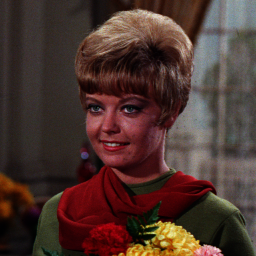

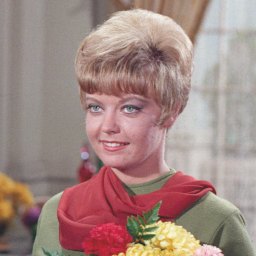

In [ ]:
# Fungsi untuk melakukan gamma correction
def gamma_correction(image, gamma=1.0):
    # Membuat lookup table untuk setiap nilai pixel
    table = np.array([255 * ((i / 255.0) ** (1.0 / gamma)) for i in np.arange(0, 256)]).astype("uint8")
    # Menerapkan transformasi gamma menggunakan lookup table
    return cv.LUT(image, table)

print('Gamma Correction pada citra')
print('----------------------------------')

# Input nilai gamma dari user
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number. Menggunakan nilai default Gamma = 1.0')
    gamma = 1.0  # Default jika input tidak valid

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

if image is None:
    print("Error: Gambar tidak ditemukan. Pastikan path gambar benar.")
else:
    # Menerapkan gamma correction dengan gamma yang diinput user
    gamma_corrected = gamma_correction(image, gamma=gamma)

    # Menampilkan gambar asli dan gambar dengan gamma correction
    cv2_imshow(image)  # Gambar asli
    cv2_imshow(gamma_corrected)  # Gambar setelah gamma correction

## **2. Simulasi Depth Image**

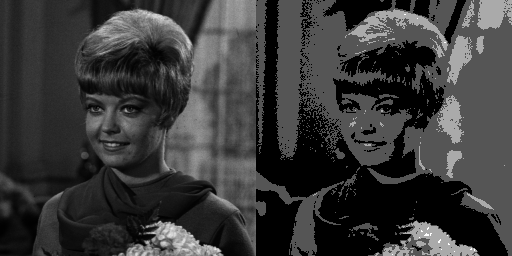

In [3]:
# Bit depth dan level kuantisasi
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar dalam format grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Pastikan gambar berhasil dibaca
if original is None:
    print('Error: Gambar tidak ditemukan!')
    exit()

# Inisialisasi gambar dengan bit depth yang baru
depth_image = np.zeros(original.shape, original.dtype)

# Proses kuantisasi berdasarkan bit depth
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        # Menghitung nilai output berdasarkan level kuantisasi
        depth_image[y, x] = round(original[y, x] / level) * level

# Menampilkan gambar asli dan gambar hasil kuantisasi
final_frame = cv.hconcat([original, depth_image])

# Menampilkan hasil di Google Colab
cv2_imshow(final_frame)

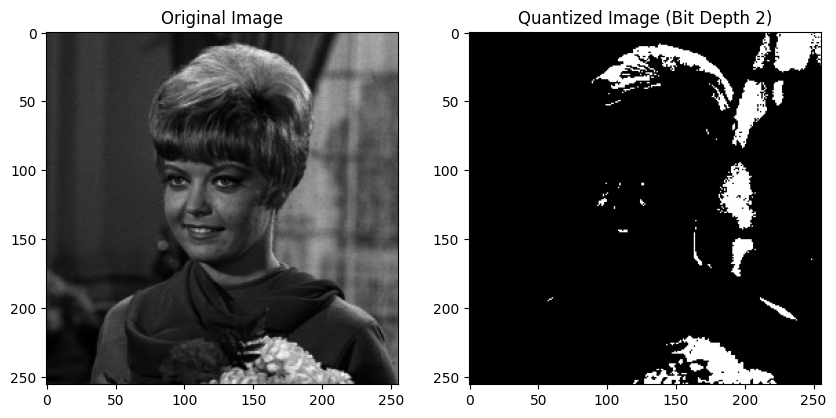

In [7]:
# Load the image
image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if original is None:
    print('Error: Image not found!')
else:
    # Bit depth and quantization level
    bit_depth = 1
    level = 255 / (pow(2, bit_depth) - 1)

    # Initialize image with new bit depth
    depth_image = np.zeros(original.shape, original.dtype)

    # Perform quantization based on bit depth
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            depth_image[y, x] = round(original[y, x] / level) * level

    # Display the original and quantized image using matplotlib
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Quantized Image (Bit Depth 2)')
    plt.imshow(depth_image, cmap='gray')

    plt.show()

## **3. Modul Average Denoising**

PSNR: 27.53 dB


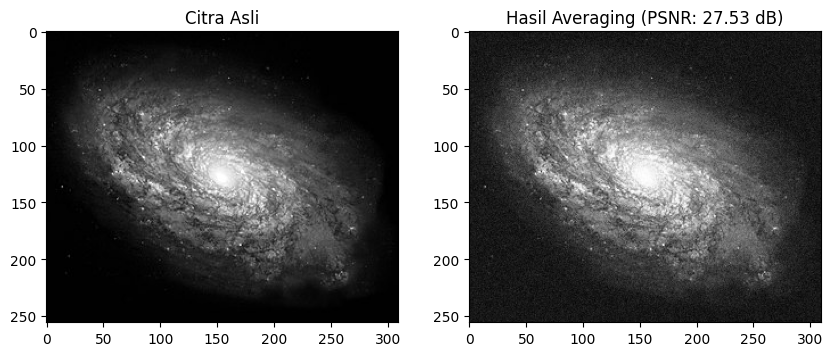

In [4]:
# Fungsi PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')  # Jika tidak ada perbedaan
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg', cv.IMREAD_GRAYSCALE)

# Memastikan citra asli berhasil dibaca
if original_image is None:
    print("Error: Citra asli tidak ditemukan!")
    exit()

# Membaca gambar dengan noise dari folder berdasarkan urutan nama (1.jpg hingga 100.jpg)
cv_img = []
for i in range(1, 101):  # Angka 1 hingga 100
    img_path = f'/content/drive/MyDrive/PCVK/Images/noises/{i}.jpg'
    n = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    if n is not None:
        cv_img.append(n)
    else:
        print(f"Error: Gambar {img_path} tidak ditemukan!")
        exit()

# Memastikan ada cukup gambar untuk averaging (minimal 5 gambar)
if len(cv_img) < 5:
    print("Error: Tidak cukup gambar di folder!")
    exit()

# Averaging 5 gambar pertama dari daftar
average_image = np.mean(cv_img[:5], axis=0).astype(np.uint8)

# Menghitung PSNR antara citra asli dan hasil averaging
psnr_value = calculate_psnr(original_image, average_image)

# Menampilkan hasil PSNR dan gambar
print(f'PSNR: {psnr_value:.2f} dB')

# Tampilkan citra asli dan citra hasil averaging
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(original_image, cmap='gray'), plt.title('Citra Asli')
plt.subplot(1,2,2), plt.imshow(average_image, cmap='gray'), plt.title(f'Hasil Averaging (PSNR: {psnr_value:.2f} dB)')
plt.show()

## **4. Image Masking**

## **5. Image Masking with other operator**